In [5]:
import numpy as np
import pandas as pd
df2=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data")
df2.head(15)

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290
5,amdahl,580-5840,23,16000,32000,64,16,32,367,381
6,amdahl,580-5850,23,16000,32000,64,16,32,489,381
7,amdahl,580-5860,23,16000,64000,64,16,32,636,749
8,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238
9,apollo,dn320,400,1000,3000,0,1,2,38,23


In [6]:
import io 
import sys 
x=df2.iloc[:,3:4].values 
y=df2.iloc[:,8].values

Model Score:  0.817302958218438
R_square score:  0.817302958218438


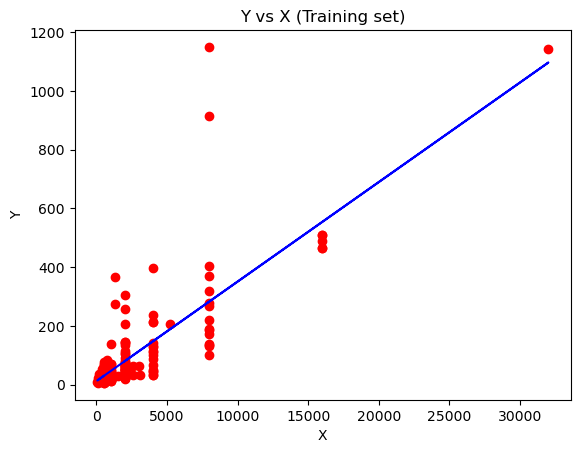

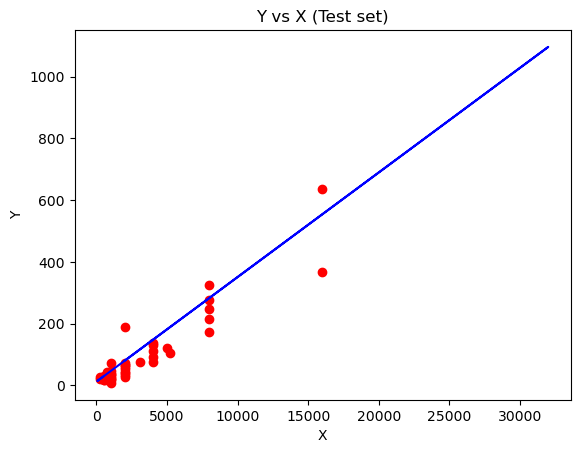

Prediction: [12.24149094 12.30926618]


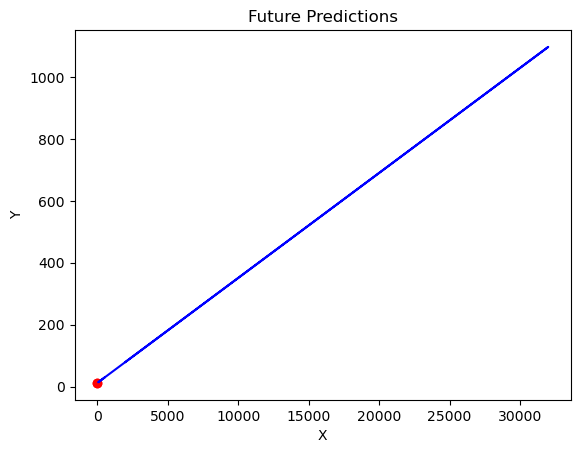

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming x and y are defined
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Create and fit the regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

# Print model score and R^2 score
print("Model Score: ", regressor.score(X_test, y_test))
print("R_square score: ", r2_score(y_test, y_pred))

# Plotting the training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Y vs X (Training set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Plotting the test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')  # This should be X_test for better visualization
plt.title('Y vs X (Test set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Future predictions
X_future_experience = [[2], [4]]
print("Prediction:", regressor.predict(X_future_experience))

# Plotting future predictions
plt.scatter(X_future_experience, regressor.predict(X_future_experience), color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Future Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

R-squared: 0.7798695513749374


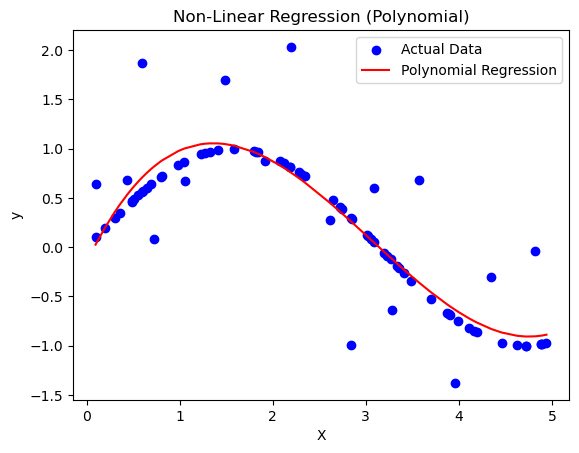

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate some sample non-linear data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))

# Create polynomial features
polynomial_features = PolynomialFeatures(degree=3)  # Adjust degree as needed
X_poly = polynomial_features.fit_transform(X)

# Fit a linear regression model to the polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions
y_pred = model.predict(X_poly)

# Evaluate the model
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

# Plot the results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-Linear Regression (Polynomial)')
plt.legend()
plt.show()
